# Implementation from Scratch

<br />

I am going to create a 3 layers of neural network for multi-class classification.

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import sys

Using TensorFlow backend.


### Prepare MNIST Dataset

In [2]:
# Download the MNIST dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Check the dataset

print(X_train.shape)   # (60000, 28, 28)
print(X_test.shape)   # (10000, 28, 28)
print(X_train[0].dtype)   # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

# Flatten

<br />

I will transform the shape (1, 28, 28) of each image to (1, 784).

In [4]:
# Flatten

X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### Visualize the Image Data

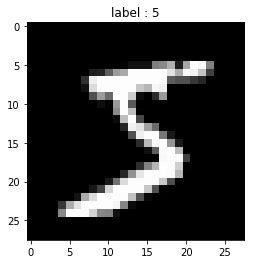

In [5]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

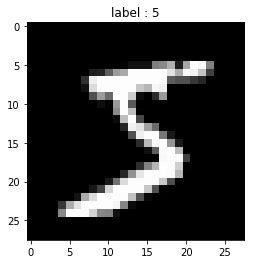

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
# Plot

index = 0
image = X_train[index].reshape(28,28)
# Change it to float
image = image.astype(np.float)
# Create minus fractional value intentionally
image -= 105.35

plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

# Check the values
print(image)

### Preprocessing

In [7]:
# Transform unit8 to float

X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

print(X_train.max())   # 1.0
print(X_train.min())   # 0.0

1.0
0.0


In [8]:
# Transform correct labels that are 0 to 9 to 

# Initialize
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])

# Transform
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

print(y_train.shape)   # (60000,)
print(y_train_one_hot.shape)   # (60000, 10)
print(y_train_one_hot.dtype)   # float64

(60000,)
(60000, 10)
float64


In [9]:
# Split the train dataset

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)

print(X_train.shape)   # (48000, 784)
print(X_val.shape)   # (12000, 784)

(48000, 784)
(12000, 784)


## [Task 1] Create a Class of Neural Network Classifier

In [11]:
# Add a path searching for specific modules
sys.path.append("../scratch/model/")

# Import a class
from scratch_neural_network import ScratchSimpleNeuralNetrowkClassifier

In [12]:
# Initialize

nn = ScratchSimpleNeuralNetrowkClassifier(100, 10, "tanh", 0.001, 784, 400, 200, 10, 0.01)

In [13]:
# Fit

nn.fit(X_train, y_train, X_val, y_val)

1th loss: 2.3040245587116717, val_loss: 2.3052964376014655
2th loss: 2.301484442615142, val_loss: 2.307273137658117
3th loss: 2.2991744509868113, val_loss: 2.308950794052445
4th loss: 2.29705419561448, val_loss: 2.310355692191882
5th loss: 2.2950896923401656, val_loss: 2.311511940609324
6th loss: 2.2932521005864226, val_loss: 2.312441448892273
7th loss: 2.29151671958955, val_loss: 2.3131639579868573
8th loss: 2.289862184102028, val_loss: 2.3136971067296788
9th loss: 2.2882698157805246, val_loss: 2.314056521891586
10th loss: 2.2867230964618543, val_loss: 2.314255921852581
11th loss: 2.2852072370485876, val_loss: 2.3143072263497677
12th loss: 2.2837088214464307, val_loss: 2.314220666616529
13th loss: 2.28221550937793, val_loss: 2.314004891721103
14th loss: 2.280715785269008, val_loss: 2.313667068073176
15th loss: 2.2791987430048404, val_loss: 2.3132129699509356
16th loss: 2.277653898356588, val_loss: 2.312647059556431
17th loss: 2.27607102242366, val_loss: 2.3119725555761583
18th loss: 2

In [14]:
# Predict

y_pred = nn.predict(X_test)

In [15]:
y_pred

array([7, 2, 1, ..., 9, 8, 6])

# Validation

## [Task 2] Plot Learning Curves

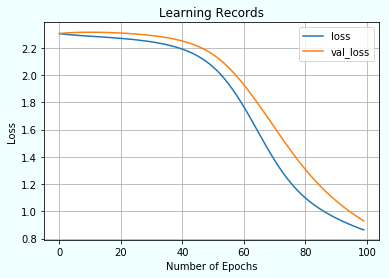

In [16]:
# Plot

nn.plot_learning_record()

## [Task 3] Compute Evaluation Indices

In [17]:
nn.compute_index_values(y_test, y_pred)

accuracy score: 0.7538


## [Option] Check Misclassification

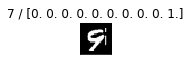

In [18]:
nn.plot_misclassification(X_val, y_val, y_pred)